# CLPS1520 Tutorial 2
## Functions and topics covered in this tutorial: 
### `ones, im2double, rgb2gray, conv2, imfilter, fspecial, element-wise operations, filtering, coding conventions, template matching`

Hey everyone, welcome to Tutorial 2 for CLPS1520: Computation Vision.  I’m Denise, and I’m one of your TAs for this class; in this tutorial, I’ll be going over some Matlab tips and tricks to help you work through your assignment.  Specifically, I’ll be going over creating and using filters on photos in Matlab.

In image processing, filtering is a technique traditionally used for modifying or enhancing an image. For example, you can filter an image to emphasize certain features or remove other features. We can create a filter in a number of ways, from handwritten functions to built-in functions in Matlab.  Let’s first try creating a filter from scratch! For instance, a box filter is a relatively simple filter.  It is just a square matrix with the same element in each entry.

So let’s start by defining how big this filter will be.  Let’s just try making it 10 by 10 (fill in ``height`` and ``width`` below).  The ``ones()`` function will create a n by m matrix where every element is a 1 -- this will make it easier to calculate the actual value the elements should be.  Then we can pointwise square each element in the matrix, then use ``sum(sum())`` to calculate the sum across all rows and columns of your matrix, and finally squareroot the entire expression.  Finally, we divide our elements in the original matrix by the calculated value to normalize.


In [2]:
height = ;
width = ;
filter_box = ones(height,width);
norm = sqrt(sum(sum(filter_box.^2)));
filter_box = filter_box./norm;


Error: Expression or statement is incomplete or incorrect.



**N.B.** For future reference, the period before these operations is very important!  If you do not include it, you will be multiplying your entire matrix by itself, which is very different from multiplying each element in the matrix by itself.

Set this aside for now, and let’s try making something a little more complicated using Matlab’s built-in function ``fspecial()``.

It is possible to create a Gaussian filter by hand, but ``fspecial()`` can do it for you very easily.  Check out the documentation for ``fspecial()`` to see all possible arguments you can pass to this function. Here, we’ll use the ‘gaussian’ filter for this tutorial.

We will call ``fspecial()`` with arguments ``‘gaussian’``, ``[10 10]`` for the size, and ``7`` for the sigma, then save the filter Matlab creates for us.


In [3]:
filter_gauss = fspecial( , , );

Error: Expression or statement is incorrect--possibly unbalanced (, {, or [.



So let’s see what these filters do when we use them on images.

First, we’ll read in some images, 'solheimajokull.png' and 'thingvellir.png', and save them as something not in Icelandic.  We’ll also convert them to doubles using ``im2double()``.

In [4]:
mountains = imread('solheimajokull.png');
mountains = im2double(mountains);
valley = imread('thingvellir.png');
valley = im2double(valley);

Error using imread (line 349)
File "solheimajokull.png" does not exist.



Try using ``imshow()`` on the images above to see what they look like.

We’ll also need to make these grayscale since ``conv2()`` only takes 2D doubles, and we see that these photos are 3D (color photos).  Use ``rgb2gray()`` on the images to make them grayscale.

In [17]:
mountains = ;
valley = ;

Now, we’re ready to apply the filters to our images.  We use conv2 for this, which takes the original image, the filter, and how you want the filter to be applied as arguments.  ‘Valid’ just means that the filter will never go out of the image’s borders.

In [ ]:
convolved_box_valley = conv2(valley, filter_box, 'valid');

Congrats, you just convolved an image!  But what did it do?  Run the following code to compare the unfiltered and filtered photo.

In [ ]:
figure(1)
imagesc(valley);
title('original image');
colormap gray;

figure(2)
imagesc(convolved_box_valley);
title('convolved image using box filter');
colormap gray;

Looks like the box filter blurred the image quite a bit.  What about the Gaussian filter?  Try filtering ``valley`` with ``filter_gauss``, the same way the box filter was applied, then image it in the same way as the box filter step above.  Feel free to use the code for visualization from above.


In [22]:
convolved_gaussian_valley = ;

figure(1)


figure(2)



Also looks like the image has been blurred.  The reason for that is that the box filter and the Gaussian filters are both averaging filters, meaning that they blur images.  They look similar because the box filter is an approximation of the more complicated and nuanced Gaussian filter.

We can also visualize the original box filter.  ``imshow()`` or ``imagesc()`` will work, but don’t forget to set the ``colormap`` to gray.


In [24]:
imagesc(filter_box)
colormap gray

Pretty plain and gray, but that makes sense considering the math we’ve done. 

We can take a look at the Gaussian filter too.  Try doing the same visualization below.

An aside: **coding conventions** for this course.  We won’t be strictly enforcing a certain methodology of naming variables and functions as long as they are legible, sensible, and clear.  However, we would prefer that you not use camelCase.  We use underscores to delimit separate words, and this is what I’m personally used to, but this may differ for everyone.  Of course, your main goal should be completing the assignment and not spending a lot of time thinking about naming conventions.

However, you WILL need to comment right below any functions that you write, declaring the data type and size of input and output and briefly describing what they mean.

Please ask us if you have any more questions about coding or naming conventions.  Hopefully, we’ll make it clear what we want from you.

A note about terminology now: we’ve gone back and forth between filtering and convolving in this assignment, but to make things clear, there are two methods of filtering: **correlation** and **convolution**.  ``imfilter()`` can do both correlation and convolution, but defaults to correlation.  ``conv2()`` can only do convolution.  The only difference between correlation and convolution is that convolution assumes that the image has been transposed, meaning that the filter was flipped horizontally as well as vertically.  The differences are mostly due to historical reasons--convolution and filtering by correlation were developed in different fields.

Back to filtering, ``imfilter()`` does almost the same exact thing as ``conv2()`` but has many more extra features.  ``imfilter()`` can handle different data types, color images (``conv2()`` only takes 2D images), switching between correlation and convolution, and provides a lot more options for deciding what happens at the borders of images.  I would recommend looking up the documentation for ``imfilter()`` for a full list of the arguments available.

Let’s try using ``imfilter()``.

Error using eval
Undefined function or variable 'mountains'.



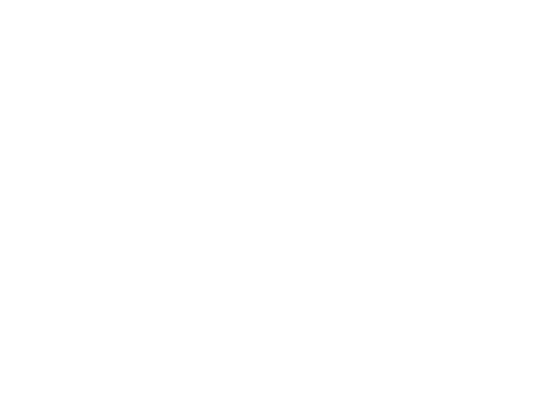

In [1]:
figure(1)
imagesc(mountains);
title('original image')
colormap gray
 
filtered_box_mountains = imfilter(mountains, filter_box);
figure(2)
imagesc(filtered_box_mountains)
title('filtered image using box filter')
colormap gray

You can see that ``imfilter()``, like ``conv2()``, also takes the image to be filtered and the filter as its arguments.  Try using ``imfilter()`` on ``valley`` in the same way we just did it above.

You might notice that ``imfilter()`` produces a dark border around the filtered output.  We can artificially get rid of this using ``‘replicate’`` or other padding options, though I would only recommend this for aesthetic purposes and not computational purposes.  **This is NOT the same as passing the argument ``‘valid’`` to conv2.**  The documentation on ``imfilter()`` says much more about the padding options that you can pass to the function.

So, that was a couple of ways to create filters and use them.  There are certain situations where different functions are easier or more effective to use, so I would recommend looking up documentation if you get confused or are unsure about their uses.

Next, we’ll try visualizing a battery of filters to get an idea of what different filters are sensitive to and try something called template matching.

Try loading in the file 'Federal_Building_Hamilton.jpg', convert it to double, and make it grayscale.  We’ll also load in a premade battery of filters.

In [ ]:
%Load image, convert to double, convert to grayscale below
img = ;

%Code for loading the filter battery is written for you below
load LMFilters;

Try visualizing the image using ``imagesc()`` to see what it looks like.  Loading ``LMFilters`` has created a data structure called ``F`` which holds all of the filters.  Try using ``size()`` on F to see what the dimensions are of this array.

The filters are arranged such that the first two dimensions correspond to the length and width of the filter itself, and the third dimension corresponds to the different types of filters.  We will be going over multi-dimensional arrays and data organization much more in depth in Tutorial 3.  For a visual display of what this battery of filters looks like, run the following lines of code:

In [ ]:
for ii =1:48
    subplot(8,6,ii), imagesc(F(:,:,ii));
    axis off; axis square; colormap gray
end

Looking through the filters, we can see that they all look slightly different.  Choose three filters from the filter battery by filling in the third index with different numbers from 1 to 48.  For the first two dimensions, we will use : since we want all values in the row and column of one filter.

In [3]:
%Choose numbers for the third dimension of the index
f1 = F(:,:, );
f2 = F(:,:, );
f3 = F(:,:, );

Error: Unbalanced or unexpected parenthesis or bracket.



Next, filter the image (``img``) with the filters that you have chosen:

In [ ]:
%Don't forget about padding using the argument 'valid'!
new_img1 = conv2( , , );
new_img2 = conv2( , , );
new_img3 = conv2( , , );

Finally, we will visualize the output of our filtering and compare it with the original image:

In [ ]:
subplot(2,2,1)
imagesc(img);
axis('off'); axis('equal'); axis('tight'); colormap(gray)
title('original image')
 
subplot(2,2,2)
imagesc(new_img1);
axis('off'); axis('equal'); axis('tight'); colormap(gray)
title('filtered image 1'); colormap gray;
 
subplot(2,2,3)
imagesc(new_img2);
axis('off'); axis('equal'); axis('tight'); colormap(gray)
title('filtered image 2'); colormap gray;
 
subplot(2,2,4)
imagesc(new_img3);
axis('off'); axis('equal'); axis('tight'); colormap(gray)
title('filtered image 3'); colormap gray;

You’ll notice that the filtered images all look slightly different.  The majority of the filters in the battery are what we call edge detectors, meaning that they respond well to edges in various orientations.

To finish off this tutorial, we will do a quick introduction to **template matching**.  Template matching is technique in image analysis that we can use in order to identify small part of an image that match a prior template that we have.

You will run the entirety of the following code.  The code will work as an interactive demo.  First, Matlab will prompt you to select an area to be the template.  You can do this by clicking and dragging your mouse on the photo to create a blue box around what you want to be your template.  Then, double click on the area of the template.

Matlab will show you the template briefly, then show your original image with some areas highlighted in green.  These are the areas that Matlab thinks matches your template the best.  Matlab will also produce another figure that color codes how well every area of your image matches with the template using a red-yellow colormap that encodes for template fit.

Feel free to try out different templates and see what sort of results you get.  Maybe some features are easier to match than others?

In [ ]:
close all
clear all
 
method = 'normxcorr2';
 
img2 = imread('soccer.jpg');
img2 = double(img2);
% If color image, convert to greyscale
if size(img2,3) > 1
    img2 = rgb2gray(img2/255);
end
 
figure(1)
imshow(img2)
 
% interactively
[sub_img,rect_img] = imcrop(img2);
h = size(sub_img, 1);
w = size(sub_img, 2);
 
 
% display sub images
figure(2), imshow(sub_img); axis image;
 
switch method
    case 'normxcorr2'
        c = normxcorr2(sub_img, img2);
        
        %crop c to make it the same size as the original image
        c = imcrop(c, [floor(w/2)+1 floor(h/2)+1 size(img2,2)-1 size(img2,1)-1]);
        
    case 'imfilter'
        c = imfilter(img2, sub_img, 'symmetric','same');
        
    case 'conv2'
        c = conv2(img2, rot90(sub_img,2),'same');
end
 
figure(3), imagesc(c/max(c(:))); axis image; colormap hot; colorbar;
 
 
% Show results using alpha-mask / assuming result image is same
% size as original image
green = cat(3, zeros(size(c)), ones(size(c)), zeros(size(c)));
figure(1)
hold on
h = imagesc(green);
hold off
 
X = 0.95;
s = sort(c(:));
set(h, 'AlphaData', c>s(round(length(c(:)).*X))); %% display top X% responses

That concludes this tutorial on filtering.  This is one of the most fundamental concepts in computational/computer vision, and I would strongly urge you to look up much of the documentation on your own, just to consolidate your knowledge and clarify the process.  And of course, the rest of the course staff and I are here to help too!

Good luck!